<a href="https://www.kaggle.com/a7madmostafa/customer-churn-eda-and-modelling?scriptVersionId=89356640" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading Data

In [2]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploring Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### `No Missing Values`

In [5]:
data.duplicated().sum()

0

### `22 rows are duplicated`

## Unique Values

In [6]:
for column in data.columns:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor


As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

***(1) Demographic Information***
* `gender`: Whether the client is a female or a male (Female, Male).
* `SeniorCitizen`: Whether the client is a senior citizen or not ( 0, 1).
* `Partner`: Whether the client has a partner or not (Yes, No).
* `Dependents`: Whether the client has dependents or not (Yes, No).

***(2) Customer Account Information***
* `tenure`: Number of months the customer has stayed with the company (Multiple different numeric values).
* `Contract`: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
* `PaperlessBilling`: Whether the client has paperless billing or not (Yes, No).
* `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
* `MontlyCharges`: The amount charged to the customer monthly (Multiple different numeric values).
* `TotalCharges`: The total amount charged to the customer (Multiple different numeric values).

***(3) Services Information***
* `PhoneService`: Whether the client has a phone service or not (Yes, No).
* `MultipleLines`: Whether the client has multiple lines or not (No phone service, No, Yes).
* `InternetServices`: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
* `OnlineSecurity`: Whether the client has online security or not (No internet service, No, Yes).
* `OnlineBackup`: Whether the client has online backup or not (No internet service, No, Yes).
* `DeviceProtection`: Whether the client has device protection or not (No internet service, No, Yes).
* `TechSupport`: Whether the client has tech support or not (No internet service, No, Yes).
* `StreamingTV`: Whether the client has streaming TV or not (No internet service, No, Yes).
* `StreamingMovies`: Whether the client has streaming movies or not (No internet service, No, Yes).

## Drop `customer ID`

In [7]:
data.drop('customerID', axis = 1, inplace=True)

## Encoding `Total Charges`

In [8]:
data['TotalCharges'].dtype

dtype('O')

In [9]:
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [10]:
data[data['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
data['TotalCharges'].isnull().sum()

11

In [13]:
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### `We Choose to drop these rows with missing values in total Charges`

In [14]:
data.dropna(inplace=True)

## Encoding `Churn`

In [15]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
data.Churn = data.Churn.map({'No': 0, 'Yes':1})

In [17]:
data.Churn.unique()

array([0, 1])

# Univariate Analysis

In [18]:
# Helper Function
def explore_cat(column):
    d= pd.DataFrame(data.groupby(column).mean()['Churn']).reset_index()
    fig , axes = plt.subplots(1,3, figsize=(20,5))
    axes[0].pie(data[column].value_counts(), labels = data[column].unique(), autopct='%.00f%%')
    sns.countplot(ax= axes[1], data = data, x= column, hue='Churn')
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 30)
    sns.barplot(ax= axes[2],data = d, x= column, y= 'Churn')
    axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 30)
    fig.suptitle(f'Exploring "{column}"')
    
def explore_num(column):
    sns.histplot(data=data, x= column, hue = 'Churn')
    plt.show()

# (1) gender

In [19]:
data.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [20]:
data.gender.value_counts(normalize =True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [21]:
data.groupby('gender').mean()['Churn']

gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64

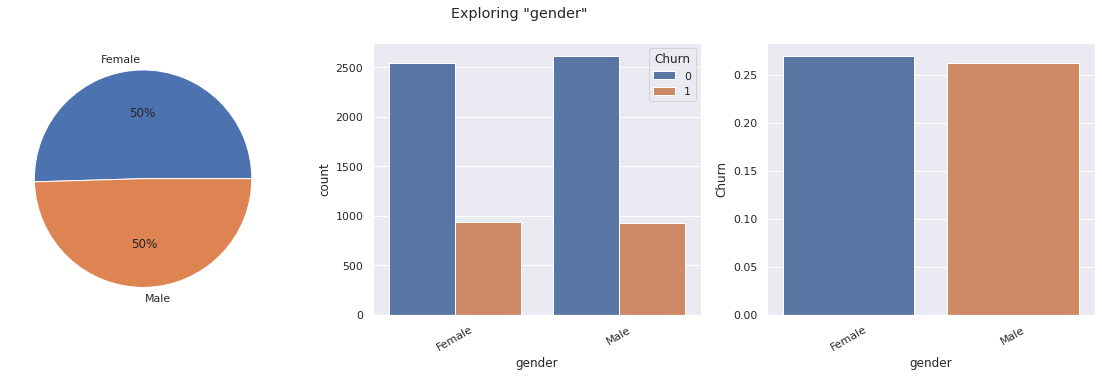

In [22]:
explore_cat('gender')

### `"gender" is not important feature`

## (2) SeniorCitizen 

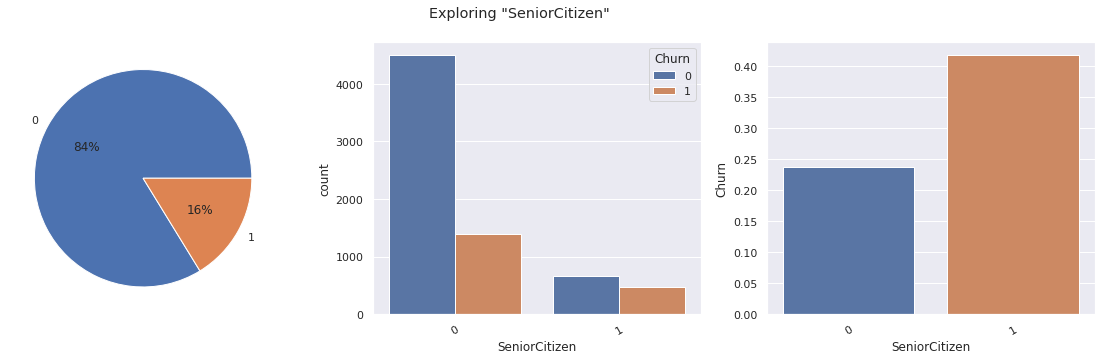

In [23]:
explore_cat('SeniorCitizen')

### `"SeniorCitizen" is important feature`

## All Demographic Features

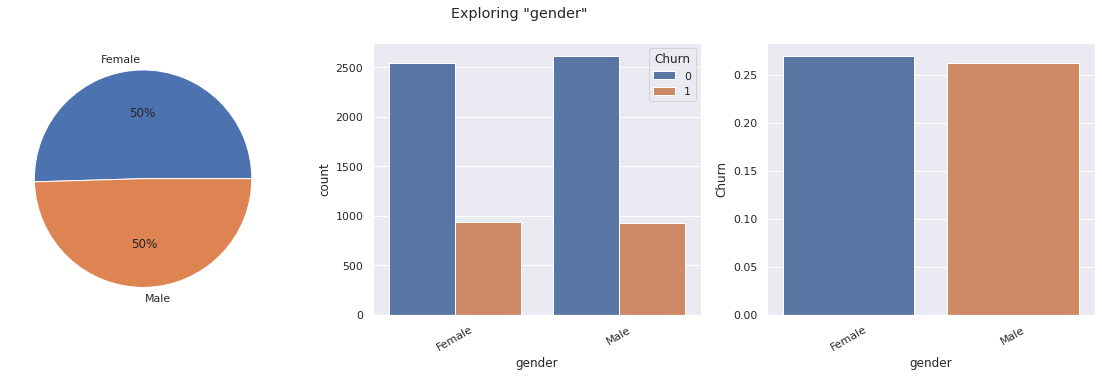

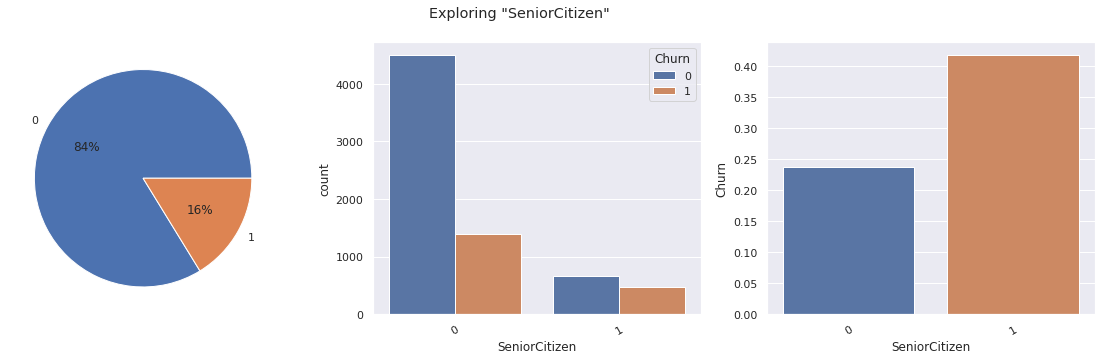

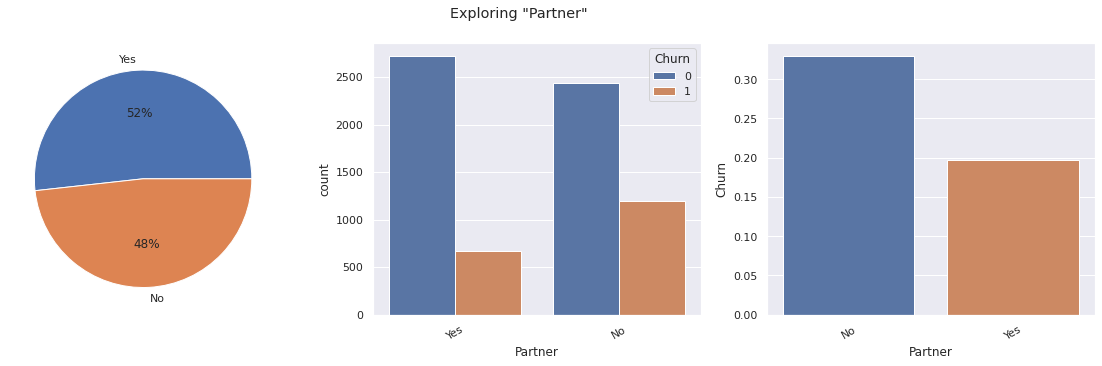

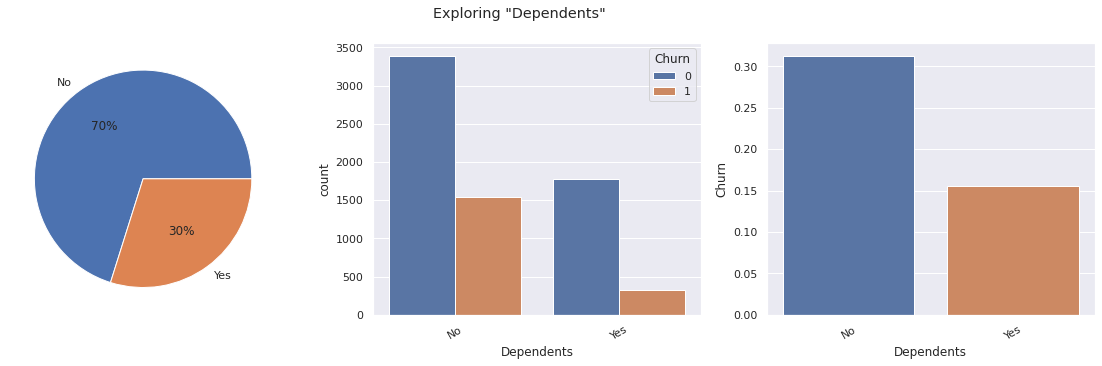

In [24]:
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for feature in demographic_features:
    explore_cat(feature)

### We can extract the following conclusions by analyzing demographic attributes:
* The churn rate of `senior citizens` is almost double that of young citizens.
* We do not expect `gender` to have significant predictive power.
* Customers with `partner` churn less than customers with no partner.
* Customers with `dependents` churn less than customers with no partner.

## Categorical Account Info.

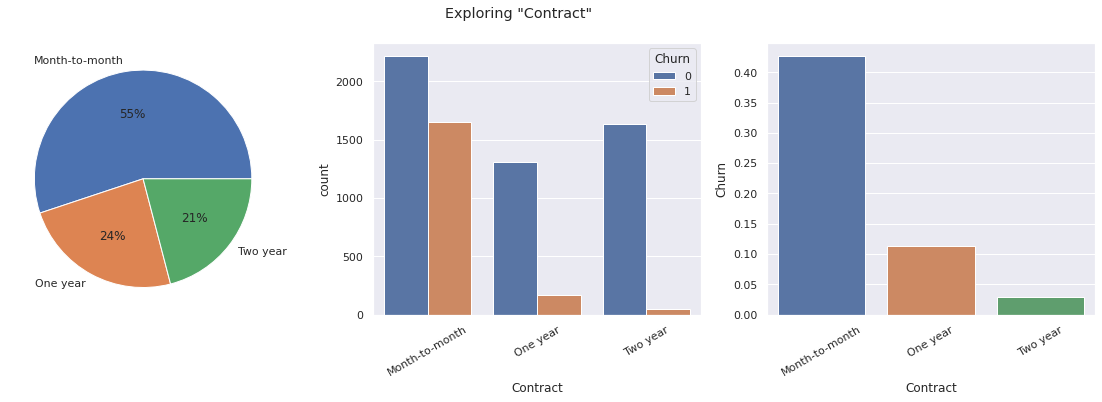

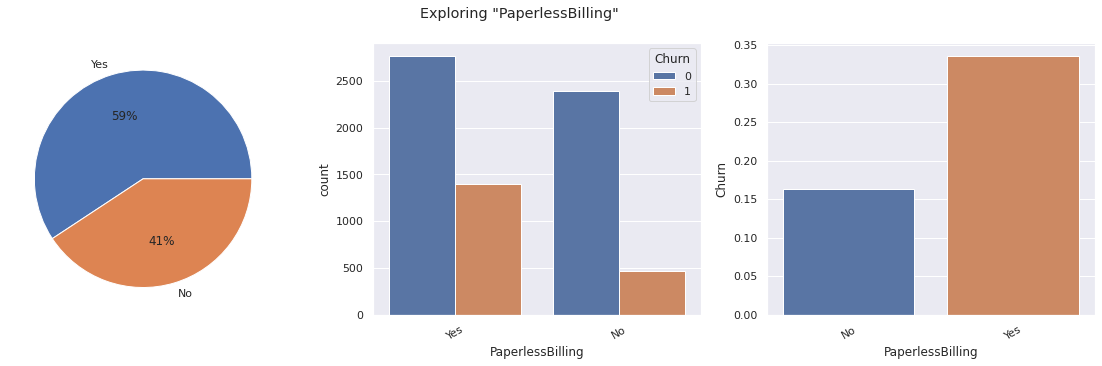

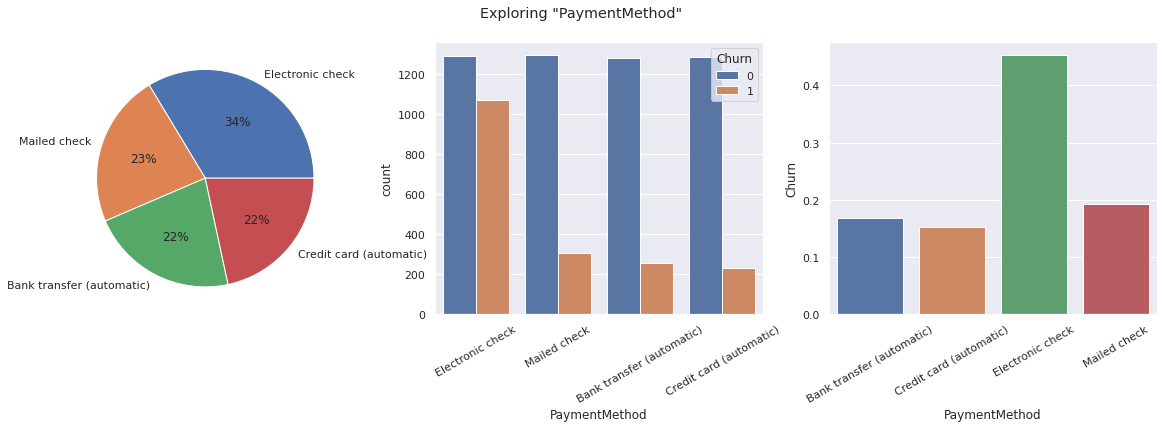

In [25]:
catAccount_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in catAccount_features:
    explore_cat(feature)

### We can extract the following conclusions by analyzing customer account attributes:
* Customers with `month-to-month` contracts have higher churn rates compared to clients with yearly contracts.
* Customers subscribed to `Paperless billing` churn more than those who are not subscribed.
* Customers pay with `Electronic check` are more likely to leave the company.


## Numerical Account Info.

In [26]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

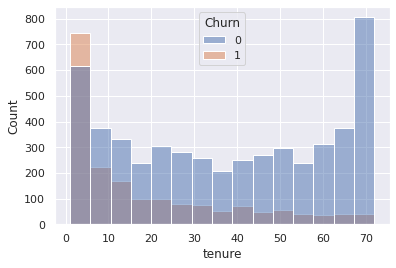

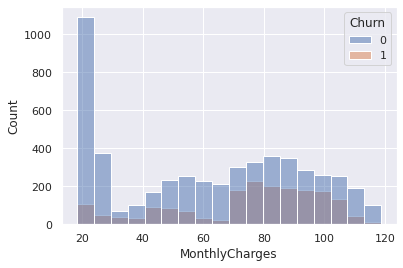

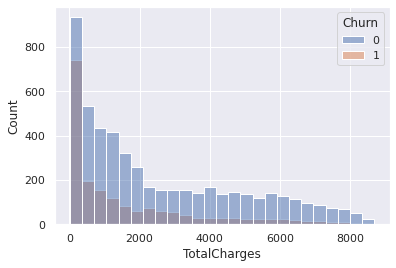

In [27]:
numAccount_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numAccount_features:
    explore_num(feature)

### We can extract the following conclusions by analyzing the histograms above:
* The churn rate tends to be larger when `monthly charges` are high.
* New customers (low `tenure`) are more likely to churn.
* Clients with high `total charges` are less likely to leave the company.

## Service Info.

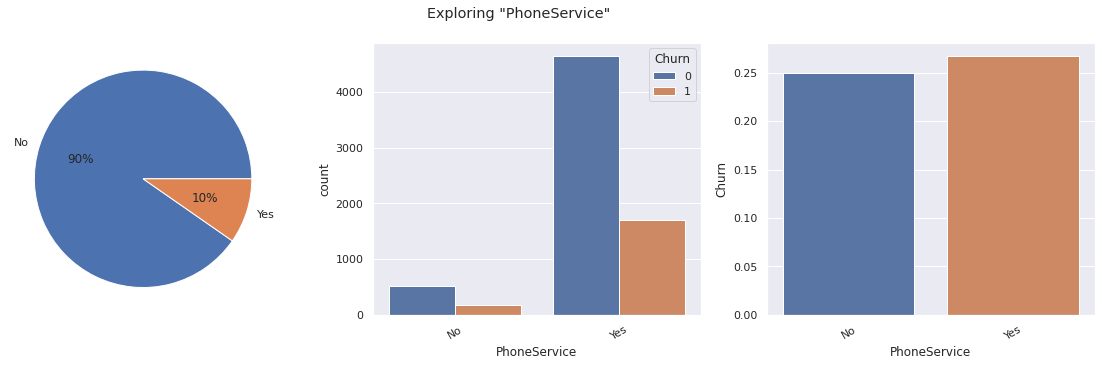

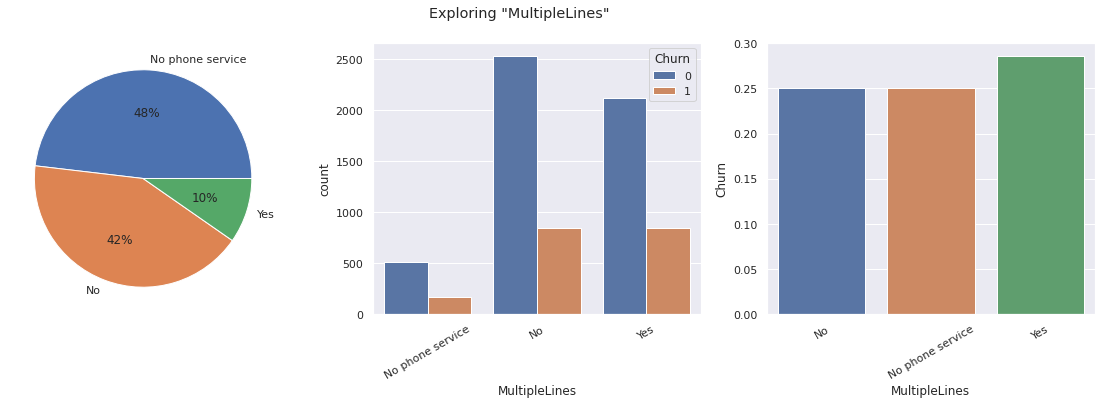

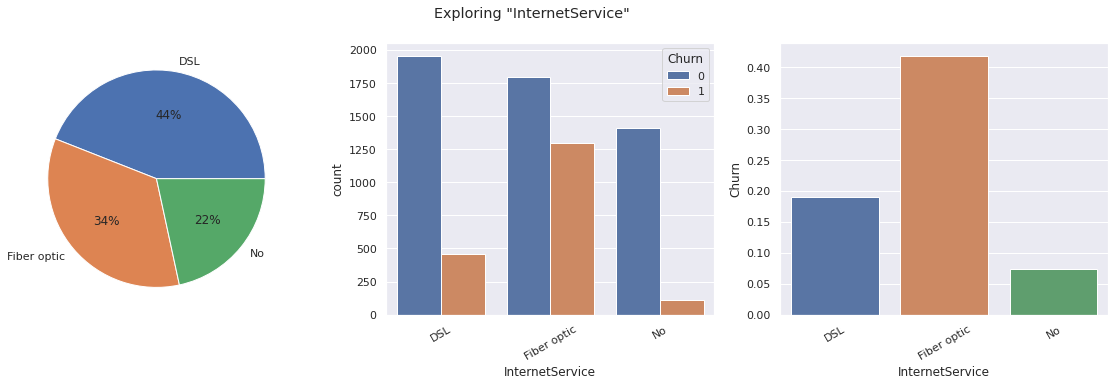

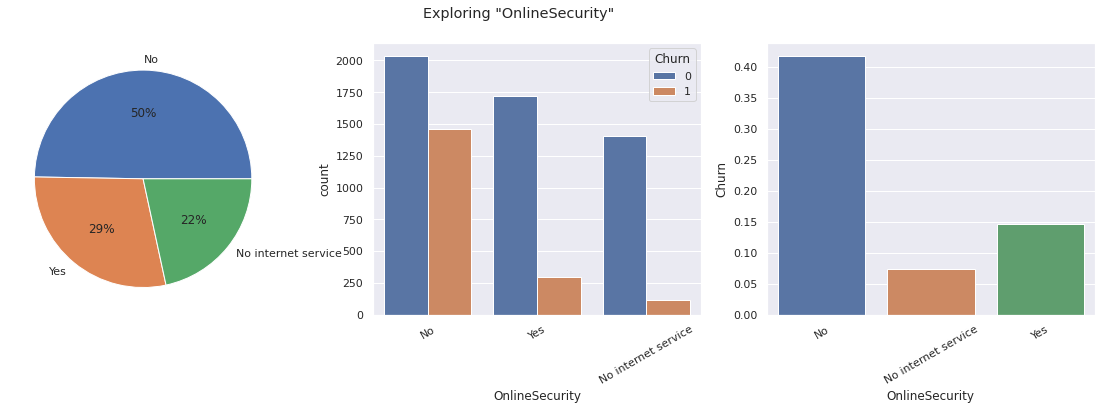

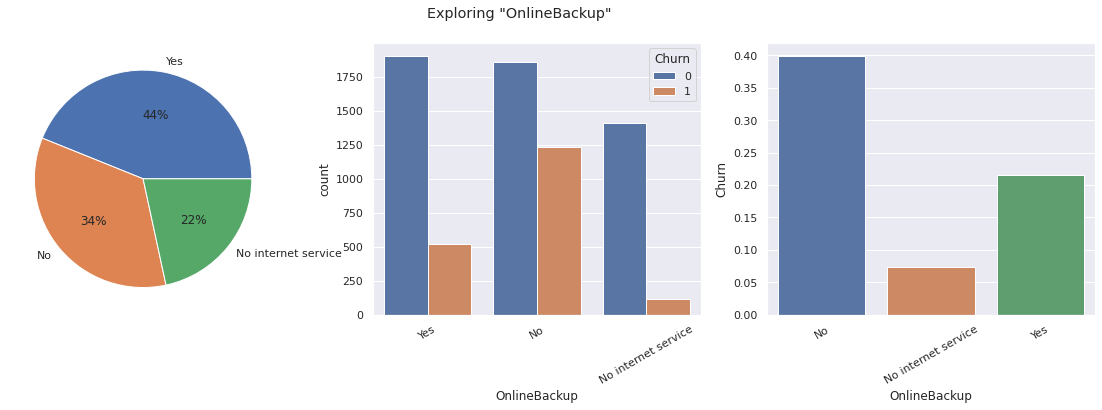

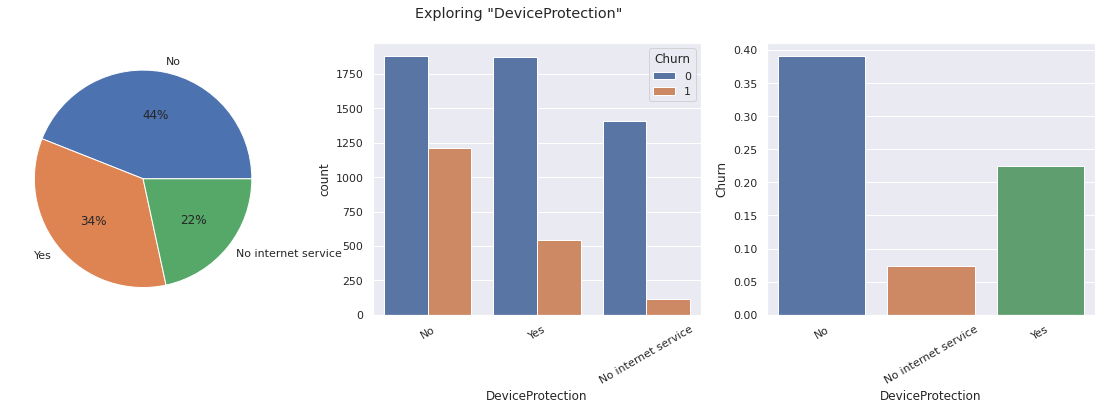

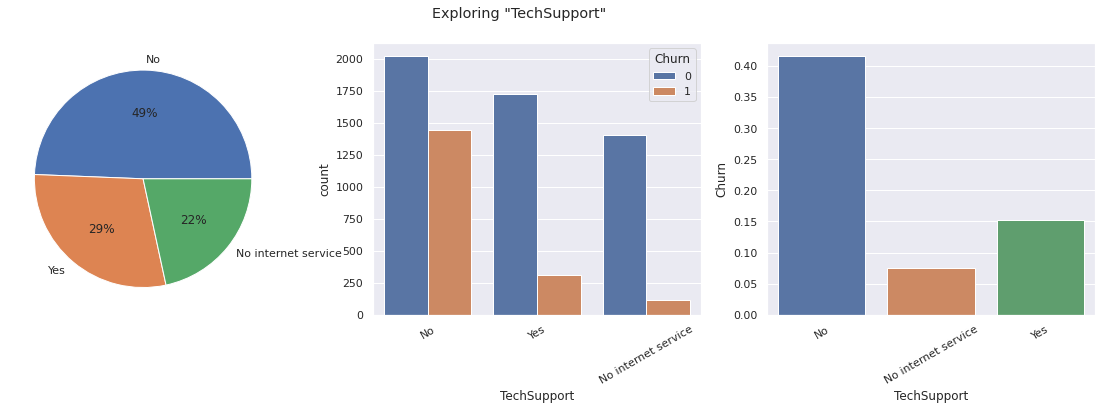

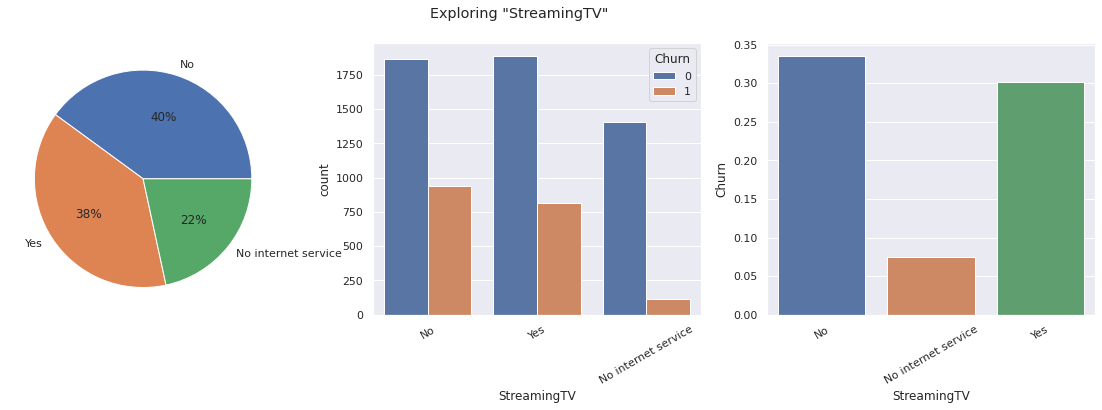

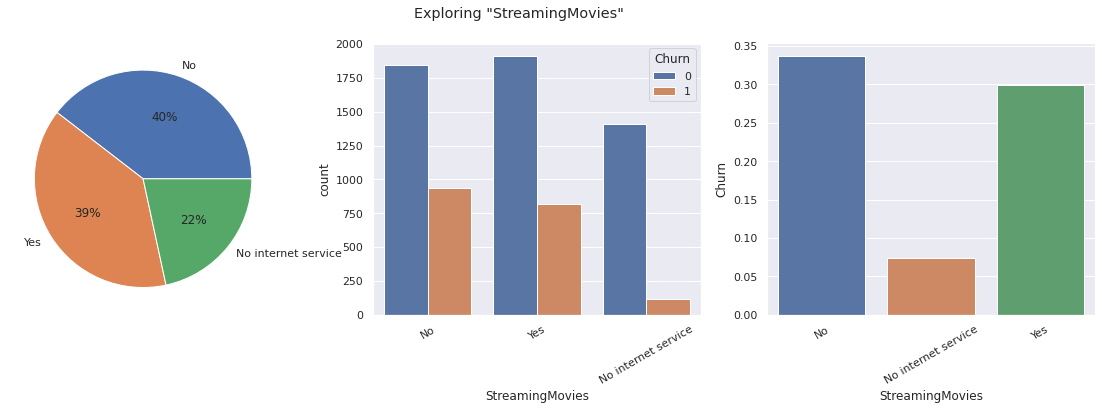

In [28]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in services_columns:
    explore_cat(feature)

### We can extract the following conclusions by evaluating services attributes:
* We do not expect phone attributes (`PhoneService` and `MultipleLines`) to have significant predictive power. 
* Clients with `online security` churn less than those without it.
* Customers with no `tech support` tend to churn more often than those with tech support.

### By looking at the plots above, we can identify the `most relevant attributes` for detecting churn. We expect these attributes to be discriminative in our future models.

In [29]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    from sklearn.metrics import mutual_info_score
    return mutual_info_score(categorical_serie, data.Churn)

# select categorial variables excluding the response variable 
categorical_variables = data.select_dtypes(include=object)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


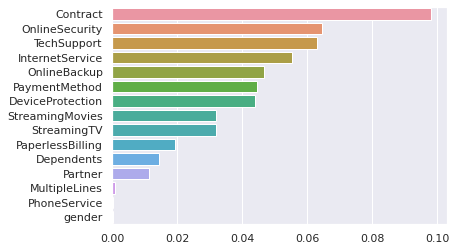

In [30]:
sns.barplot(x=feature_importance.values, y= feature_importance.index);

### Note: 

The mutual information extends the notion of `correlation` to nonlinear relationships since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

In [31]:
!pip install pandas-profiling

In [32]:
import pandas_profiling
data.profile_report()

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion and Recommendations

# Modelling

In [33]:
df = pd.get_dummies(data, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [34]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [36]:
len(x_train), len(x_test)

(5625, 1407)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x_train,y_train)
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print('Training ACC.: ', train_score)
print('Testing ACC.: ', test_score)

Training ACC.:  0.9980444444444444
Testing ACC.:  0.7874911158493249


## This is `Overfitting`